In [ ]:
#Tạo dữ liệu
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
X_train =[i for i in range (0,180)]
y_train =[i for i in range (0,180)]
X_test =[i for i in range (0,60)]
y_test =[i for i in range (0,60)]
%cd '/content/drive/MyDrive/BT_AI/Tuan/'
for i in range (0,60):
  X_train[i] = cv2.imread('Tuan_'+str(i+1)+'.jpg')
  X_train[i] = cv2.resize(X_train[i],(150,150))
  y_train[i] = 0
for i in range (0,20):
  X_test[i] = cv2.imread('Tuan_'+str(i+61)+'.jpg')
  X_test[i] = cv2.resize(X_test[i],(150,150))
  y_test[i] = 0

%cd '/content/drive/MyDrive/BT_AI/Hung/'
for i in range (0,60):
  X_train[i+60] = cv2.imread('Hung_'+str(i+1)+'.jpg')
  X_train[i+60] = cv2.resize(X_train[i+60],(150,150))
  y_train[i+60] = 1

for i in range (0,20):
  X_test[i+20] = cv2.imread('Hung_'+str(i+61)+'.jpg')
  X_test[i+20] = cv2.resize(X_test[i+20],(150,150))
  y_test[i+20] = 1

%cd '/content/drive/MyDrive/BT_AI/Thinh/'
for i in range (0,60):
  X_train[i+120] = cv2.imread('Thinh_'+str(i+1)+'.jpg')
  X_train[i+120] = cv2.resize(X_train[i+120],(150,150))
  y_train[i+120] = 2

for i in range (0,20):
  X_test[i+40] = cv2.imread('Thinh_'+str(i+1)+'.jpg')
  X_test[i+40] = cv2.resize(X_test[i+40],(150,150))
  y_test[i+40] = 2
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

/content/drive/MyDrive/BT_AI/Tuan
/content/drive/MyDrive/BT_AI/Hung
/content/drive/MyDrive/BT_AI/Thinh


In [ ]:
from os import listdir
from numpy import asarray,save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
folder = '/content/drive/MyDrive/AI/3KhuonMat/'
folder1 = '/content/drive/MyDrive/AI/Test3KhuonMat/'
X_train, y_train = list(),list()
X_test, y_test = list(),list()
for file in listdir(folder):
  output = 0.
  if file.startswith('Thinh'):
    output = 1.0
  if file.startswith('Hung'):
    output = 2.0
  photo = load_img(folder+file,target_size=(150,150))
  photo = img_to_array(photo)
  X_train.append(photo)
  y_train.append(output)
X_train = asarray(X_train)
y_train= asarray(y_train)
for file in listdir(folder1):
  output = 0.
  if file.startswith('Thinh'):
    output = 1.0
  if file.startswith('Hung'):
    output = 2.0
  photo = load_img(folder1+file,target_size=(150,150))
  photo = img_to_array(photo)
  X_test.append(photo)
  y_test.append(output)
X_test = asarray(X_test)
y_test= asarray(y_test)
print("X_test",X_test.shape,'và y_test',y_test.shape)
print('X_train',X_train.shape,'và y_train',y_train.shape)
save('X_test.npy',X_test)
save('y_test.npy',y_test)
save('X_train.npy',X_train)
save('y_train.npy',y_train)

X_test (87, 150, 150, 3) và y_test (87,)
X_train (330, 150, 150, 3) và y_train (330,)


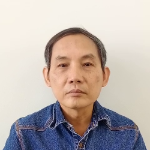

2


In [ ]:
cv2_imshow(X_train[150])
print(y_train[150])

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
type(X_train)

(330, 150, 150, 3)
(330,)
(87, 150, 150, 3)
(87,)


numpy.ndarray

In [ ]:
#Xử lý dữ liệu
X_train = X_train.reshape(330,150,150,3)
X_test = X_test.reshape(87,150,150,3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255

In [ ]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train,3)
y_test=np_utils.to_categorical(y_test,3)

In [ ]:
#Khai báo thư viện, khỏi tạo model và trainning
from keras.models import Sequential
from keras.layers import Conv2D
from tensorflow.keras.optimizers import SGD
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.callbacks import EarlyStopping 
from keras.layers import Dense, Activation, BatchNormalization, Dropout, LSTM
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(3,activation='softmax'))
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=50, batch_size=32, validation_data=(X_test,y_test),verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
11/11 [==============================] - 12s 92ms/step - loss: 9.8543 - accuracy: 0.4273 - val_loss: 0.3940 - val_accuracy: 0.9425
Epoch 2/50
11/11 [==============================] - 0s 38ms/step - loss: 0.0997 - accuracy: 0.9909 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 3/50
11/11 [==============================] - 0s 43ms/step - loss: 0.3038 - accuracy: 0.9182 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 4/50
11/11 [==============================] - 0s 42ms/step - loss: 0.0249 - accuracy: 0.9909 - val_loss: 4.7915e-04 - val_accuracy: 1.0000
Epoch 5/50
11/11 [==============================] - 0s 42ms/step - loss: 7.8166e-04 - accuracy: 1.0000 - val_loss: 8.1214e-05 - val_accuracy: 1.0000
Epoch 6/50
11/11 [==============================] - 0s 42ms/step - loss: 6.2317e-05 - accuracy: 1.0000 - val_loss: 6.4859e-05 - val_accuracy: 1.0000
Epoch 7/50
11/11 [==============================] - 0s 41ms/step - loss: 3.5924e-05 - accuracy: 1.0000 - val_loss: 6.8876e-06 - val_a

In [ ]:
#Độ chính xác
score = model.evaluate (X_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 4.5765338541059464e-07
Test accuracy: 1.0


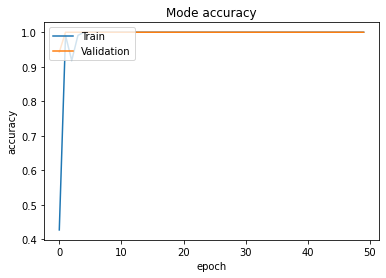

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Mode accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.show()

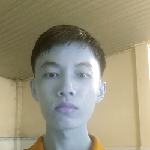

0


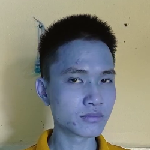

2


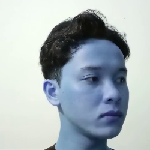

1


In [ ]:
#Kiểm tra nhận dạng
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
img = load_img('Tuan.jpg', target_size=(150,150))
img = img_to_array(img)
cv2_imshow(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255
print(np.argmax(model.predict(img)))
img = load_img('Hung.jpg', target_size=(150,150))
img = img_to_array(img)
cv2_imshow(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255
print(np.argmax(model.predict(img)))
img = load_img('Thinh.jpg', target_size=(150,150))
img = img_to_array(img)
cv2_imshow(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255
print(np.argmax(model.predict(img)))

In [ ]:
y_pred = model.predict(X_test[15].reshape(1,150,150,3))
print(np.argmax(y_pred))

0
